<a href="https://user.oc-static.com/upload/2020/11/23/16061367402655_Capture%20d%E2%80%99e%CC%81cran%202020-11-23%20a%CC%80%2014.05.04.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2020/11/23/16061367402655_Capture%20d%E2%80%99e%CC%81cran%202020-11-23%20a%CC%80%2014.05.04.png" alt="Logo de Lapage"></a>

# 📚 <font color='indianred'>Analysez les ventes d'une librairie avec R ou Python</font>


# <font color='indianred'> SOMMAIRE<font></a>


# <a href="#C1">1. Missions & objectifs</a>

    
# <a href="#C2">2. Inspection des données</a>
    

  - <a href="#C3"> 2.1 Importation  des librairies et chargement des données </a> 
  - <a href="#C4"> 2.2 Déscription des fichiers csv sources </a> 

    - <a href="#C5"> 2.3.1 Fichier costumers </a>
    - <a href="#C6"> 2.3.2 Fichier products </a>
    - <a href="#C7"> 2.3.3 Fichier transactions </a>


# <a href="#C8"> 3. Préparation de données </a>
    

  - <a href="#C9"> 3.1 Traitement des erreurs de formatage (date)  </a>
  - <a href="#C10"> 3.2 Jointure des dataframes </a>
    
 
# <a href="#C11"> 4. Analyse uni-variée des indicateurs</a>
    
    
  - <a href="#C12">4.1 Statistiques descriptives</a>
  - <a href="#C13">4.2 Analyse du Chiffre d’affaire (CA)</a>
    
       - <a href="#C14">4.2.1 Le chiffre d'affaire total (CA)</a>
       - <a href="#C15">4.2.2 Répartition du chiffre d'affaire par catégorie de produits vendus</a>
       - <a href="#C16">4.2.3 L'evolution temporelle de CA & CA par catégorie</a> 
       - <a href="#C17">4.2.4 Saisonnalité du chiffre d'affaire et tendance globale</a> 
       - <a href="#C18">4.2.5 Zoom sur les références:Les tops et les flops</a>
    
    
   - <a href="#C19">4.3 Analyse des produits</a> 
    
       - <a href="#C20"> 4.3.1 Prix de produits par catégorie </a> 
       - <a href="#C21"> 4.3.2 Répartition de nombre de produits par catégorie</a>
       - <a href="#C22"> 4.3.3 Répartition du CA par produit</a>
       - <a href="#C23"> 4.3.4 Nombre de ventes par produit</a>
       - <a href="#C24"> 4.3.5 Répartition du chiffre d'affaire généré par nombre de produits achetés</a>
  
    
    
   - <a href="#C25"> 4.4  Analyse des clients</a>
    
       - <a href="#C26"> 4.4.1 Répartition par genre de clients</a>
       - <a href="#C27"> 4.4.2 Répartition des clients par classe d'âge</a>
       - <a href="#C28"> 4.4.3 L'âge de clients par genre</a>
       - <a href="#C29"> 4.4.4 Répartition du CA par client</a>
       - <a href="#C30"> 4.4.5 Répartition du CA par genre de clients acheteurs</a>    

   
# <a href="#C31"> 5. Analyse bi-variées des indicateurs </a> 
    
    
  - <a href="#C32"> 5.1 Lien entre le genre et les catégories des livres achetés</a> 
  - <a href="#C33"> 5.2 Lien entre l' age des clients et le Montant total des achats(CA)</a>
  - <a href="#C34"> 5.3 Lien entre l' age des clients et la fréquence d'achat</a>
  - <a href="#C35"> 5.4 Lien entre l' age des clients et la taille moyenne du panier(CA)</a>
  - <a href="#C36"> 5.5 Lien entre l' age des clients et la catégorie des livres achetée(CA)</a>

# <a name="C1"><font>1. Missions & objectifs </font></a>

- **La librairie 'Lapage',une grande chaîne de librairie,vend des livres en ligne avec grand succès, en se basant sur leurs algorithmes de recommendation.**
- **On va proposer une analyse de contenue de leur base de données via Python.**

<font color='indianred'>Missions<font></a>

- **"Lapage" souhaite faire le point après deux ans d’exercice, et analyser ses points forts, ses points faibles, les comportements clients, décider si nous devons créer certaines offres, adapter certains prix, etc..**


 <font color='indianred'>Objectifs<font></a> 

- **Explorer les données de ventes de l'Entreprise, En cherchant les informations pertinentes pour comprendre les tendances de ventes. cela compris:**

- **Nettoyage de données (valeurs manquants & aberrants)**

- **Analyse de données (KPIs, tendances centrals & dispersion, concentration)**

- **Caractériser les dépendances entre les indicateurs categoriales des clients (âge, sexe) et les tendances de ventes (montants d'achats, fréquence, taille du panier, catégories de produits)**

- **Representation visuelle des résultats (hists, boxplots,scatterplot,...)**


<font color='indianred'>Nos jeux de données contiennent:<font></a>

- **products = données fictives sur les produits de la librairie**
- **customers = données fictives sur les clients de la librairie**
- **transactions = données fictives sur les ventes de la librairie**

# <a name="C2">2. Inspection des données</a>

## <a name="C3"> <font color='indianred'>2.1 Importation  des librairies et chargement des données:</a> 

In [1]:
# Librairies de calcul:
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime as dt
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Librairies de visualisation:
import matplotlib.pyplot as plt
import seaborn as sns

# Import des données:
transactions_df = pd.read_csv("Transactions.csv", parse_dates = [1])
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")

## <a name="C4"> <font color='indianred'>2.2  Description des fichiers csv de données</a> 

A fin de decrire une data frame, on définit:

- le nombre de lignes & colonnes
- le compteur de valeurs totals & uniques
- le type de chaque colonne
- le pourcentage de valeurs nulls
- les valeurs aberrants

### Observation et nettoyage des Dataframes

### Lors de cette section, on va chercher les différentes erreurs dans les 3 fichiers, essayer de les réparer afin de permettre une jointure éventuelle des 3 fichiers.

### Fonctions utiles

In [2]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = df.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = df.notnull().sum() #count de values non nulls
    desc['unique'] = df.nunique() # nombre de values unique
    desc['dtype'] = df.dtypes # type de données dans chque colonne
    desc['count_null']=df.isna().sum() #count de valeurs nulls
    desc['null%']=round((df.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=df.duplicated().sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

def plot_categ_counts(df=products_df):
    _,ax=plt.subplots(figsize=(10,6))
    categs= df['categ'].value_counts().head(5).reset_index(name='count')
    sns. barplot(ax=ax,y=categs['categ'],x=categs['count'],orient='h')
    ax.set_title('Nombre de produits par {categ}')
    sns.despine()

### <a name="C5"><font color='indianred'> 2.3.1 Fichier customers </a>

In [3]:
#Vérifier les différentes informations et voir quels variables contiennent des valeurs manquantes
customers_df.info()
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [4]:
#afficher les premières lignes de dataframe
customers_df.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
(decrire_dataframe(customers_df).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,client_id,8623,8623,object,0,0.000000,0
1,sex,8623,2,object,0,0.000000,0
2,birth,8623,76,int64,0,0.000000,0


In [6]:
#Vérifier l'unicité de la clé primaire
cle_primaire(customers_df,'client_id')

La variable client_id est une clé primaire


### ⁉ Y-a-t-il des valeurs aberrants ?

In [7]:
print('les valeurs unique de la colonne sex: \n',customers_df.sex.unique())

les valeurs unique de la colonne sex: 
 ['f' 'm']


In [8]:
print('le client le plus jeune est né à: \n',customers_df.birth.max(),
      '\n le client le plus agé est né à: \n',customers_df.birth.min())

le client le plus jeune est né à: 
 2004 
 le client le plus agé est né à: 
 1929


In [9]:
#Repartition de clients selon sexe
print('nombre de client selon sexe \n',customers_df.sex.value_counts())
print('pourcentage de clients selon sexe \n',round(customers_df.sex.value_counts()/customers_df.shape[0]*100,2))

nombre de client selon sexe 
 f    4491
m    4132
Name: sex, dtype: int64
pourcentage de clients selon sexe 
 f    52.08
m    47.92
Name: sex, dtype: float64


### Bilan

- **Le fichier costumers décrit 8623 de clients mentionnés par leurs id unique et leurs année de naissance (de 1929 à 2004) 
  et classifiés selon sexe (4491 Femmes & 4132 Hommes --> 52% Femmes).**
- **Les colonnes ne contiennent pas des valeurs manquantes ni aberrantes, la colonne client_id est une clé primaire sans
  doublons.**

### <a name="C6"><font color='indianred'> 2.3.2 Fichier products</a> 

In [10]:
#Vérifier les différentes informaTions et voir quels variables contiennent des valeurs manquantes
products_df.info()
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [11]:
(decrire_dataframe(products_df).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,id_prod,3287,3287,object,0,0.000000,0
1,price,3287,1455,float64,0,0.000000,0
2,categ,3287,3,int64,0,0.000000,0


In [12]:
#Vérifier l'unicité de la clé primaire
cle_primaire(products_df,'id_prod')

La variable id_prod est une clé primaire


### ⁉ Y-a-t-il des valeurs aberrants?

In [13]:
print('les valeurs unique de la colonne categ: \n',products_df.categ.unique())

les valeurs unique de la colonne categ: 
 [0 1 2]


In [14]:
print('le produit le plus cher est au prix de: \n',products_df.price.max(),
      '\n le produit le moins cher est au prix de: \n',products_df.price.min())

le produit le plus cher est au prix de: 
 300.0 
 le produit le moins cher est au prix de: 
 -1.0


In [15]:
#j'affiche les prix par ordre décroissant
products_df.sort_values('price').head()

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0


In [16]:
#Répartition des produits selon catégorie
products_df.categ.value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

In [17]:
#j'affiche les prix qui sont inférieurs à zéro
products_df[products_df['price']<0]

,id_prod,price,categ
731,T_0,-1.0,0


In [18]:
#Je supprime la valeur aberrante
products_df=products_df[products_df['price']>=0]
products_df

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [19]:
#J'affiche le descriptif statistique 
products_df.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [20]:
#Répartition de produits selon catégorie
print('nombre de produits selon categ \n',products_df.categ.value_counts())
print('pourcentage de clients selon categ \n',round(products_df.categ.value_counts()/products_df.shape[0]*100,2))

nombre de produits selon categ 
 0    2308
1     739
2     239
Name: categ, dtype: int64
pourcentage de clients selon categ 
 0    70.24
1    22.49
2     7.27
Name: categ, dtype: float64


### Bilan

- **Le fichier products décrit 3286 produits mentionnés par leurs id unique et leurs prix et classifiés en trois catégories 0,1,2 (catégorie 0 a le plus de produits, 2 a le moins).**
- **les colonnes ne contiennent pas des valeurs manquantes.**
- **la colonne id_prod est une clé primaire sans doublons.** 
- **la colonne price contient une seule valeure aberrante (un prix négatif de l'index 731)**
- **les types de données sont bons**

### <a name="C7"> <font color='indianred'>2.3.3 Fichier transactions</a>  

In [21]:
#Vérifier les différentes informaTions et voir quels variables contiennent des valeurs manquantes
transactions_df.info()
transactions_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [22]:
(decrire_dataframe(transactions_df).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,id_prod,679532,3267,object,0,0.000000,126
1,date,679532,679371,object,0,0.000000,126
2,session_id,679532,342316,object,0,0.000000,126
3,client_id,679532,8602,object,0,0.000000,126


In [23]:
#Vérifier l'unicité de la clé primaire
cle_primaire(transactions_df,'id_prod')
cle_primaire(transactions_df,'session_id')
cle_primaire(transactions_df,'client_id')

La variable id_prod n'est pas une clé primaire
La variable session_id n'est pas une clé primaire
La variable client_id n'est pas une clé primaire


# <a name="C8">3. Préparation de données </a>

## <a name="C9"><font color='indianred'> 3.1 Traitement des erreurs de formatage (date)  </a> 

## Vérification de format de la colonne date


- **transactions: la colonne 'date' est de type object alors qu'il doit être de type datetime**
- **Vérification de format de la colonne date**

- **pd.to_datetime(transactions_df['date']):retourne une erreur indiquant que certains lignes contiennent des dates commencent par un string 'test'**

- **Cherchons ces lignes par la suite!**

In [24]:
transactions_df

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [25]:
#J'affiche les lignes qui contiennet "test"
transactions_test =transactions_df.loc[transactions_df['date'].str.contains('test')]
transactions_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [26]:
#nombre de valeurs uniques
transactions_test.nunique()

id_prod        1
date          39
session_id     1
client_id      2
dtype: int64

In [27]:
print('l\'indetifiant de produit test',transactions_test['id_prod'].unique())
print('l\'identifiant de session test',transactions_test['session_id'].unique())
print('les identifiants de clients test',transactions_test['client_id'].unique())

l'indetifiant de produit test ['T_0']
l'identifiant de session test ['s_0']
les identifiants de clients test ['ct_0' 'ct_1']


Les dates bizzares correspondent aux 200 tests:
un seul produit (id_prod: T_0 qui est le même dont le prix négative au fichier products) acheté par deux clients imaginaires (client_id: ct_0, ct_1) lorsque d'une seule session identifié (session_id: s_0)

Si ces produits /clients n'exist pas hors test (sont vraiement pour les tests seulement) On pourra les désélectionner dans le contexte de nettoyage de données.

In [28]:
transactions_df.loc[(transactions_df["id_prod"]=="T_0"),("session_id","date","client_id")].describe()

,session_id,date,client_id
count,200,200,200
unique,1,39,2
top,s_0,test_2021-03-01 02:30:02.237413,ct_0
freq,200,13,106


### Bilan

- **Pas de valeurs nulls pour le fichier transactions.**
- **Les dates bizzares correspondent aux 200 tests**
- **Un seul produit (id_prod:T_0 qui a un prix négatif de -1 achetés par deux clients imaginaires(client_id: ct_0, ct_1)**
- **lorsqu'une seule session identifiée (session_id: s_0)**                
- **Les 200 lignes doivent être supprimées du dataframe car ils s'agissent des tests faisant des transactions fictives**

In [29]:
#suppression du produit test et changement de type de date
transactions_df.drop(transactions_df[(transactions_df["id_prod"] == "T_0")].index, inplace=True)
transactions_df["date"] =pd.to_datetime(transactions_df["date"], yearfirst= True)
transactions_df["date"]
#vérification:
transactions_df.info()
transactions_df[['date']].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


C:\Users\MAHJOUB Samira\AppData\Local\Temp\ipykernel_23616\2513722060.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions_df[['date']].describe()


,date
count,679332
unique,679332
top,2022-05-20 13:21:29.043970
freq,1
first,2021-03-01 00:01:07.843138
last,2023-02-28 23:58:30.792755


In [30]:
(decrire_dataframe(transactions_df).reset_index().style
    .bar(axis='index', subset=['count'], color='orange')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,id_prod,679332,3266,object,0,0.000000,0
1,date,679332,679332,datetime64[ns],0,0.000000,0
2,session_id,679332,342315,object,0,0.000000,0
3,client_id,679332,8600,object,0,0.000000,0


- **Les 200 lignes "test" ont bien été suprimées de notre dataframe et les dates sont bien lues en datetime.**

## <a name="C10"><font color='indianred'> 3.2 Jointure des Data Frames </a>

## **products & transactions**

- **clé de jointure: id_prod**

- **vérifions l'unicité du clé dans les deux Data frames**


**Y-a-t-il des produits vendus sans registres dans le catalogue 'products'? Les quels?**

**Y-a-t-il des produits présents au catalogue sans transactions (produits jamais vendus)? Les quels?**


In [31]:
(decrire_dataframe(customers_df).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,client_id,8623,8623,object,0,0.000000,0
1,sex,8623,2,object,0,0.000000,0
2,birth,8623,76,int64,0,0.000000,0


In [32]:
(decrire_dataframe(products_df).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,id_prod,3286,3286,object,0,0.000000,0
1,price,3286,1454,float64,0,0.000000,0
2,categ,3286,3,int64,0,0.000000,0


In [33]:
(decrire_dataframe(transactions_df).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,id_prod,679332,3266,object,0,0.000000,0
1,date,679332,679332,datetime64[ns],0,0.000000,0
2,session_id,679332,342315,object,0,0.000000,0
3,client_id,679332,8600,object,0,0.000000,0


- **La variable id_prod est une bonne clé pour products_id puisqu'on trouve 3286 valeurs uniques sur 3286 valeurs au total.**
- **La variable client_id est une bonne clé pour customers_id puisqu ilya 8623 valeurs uniques sur 8623 valeurs au total.**

In [34]:
print('le nombre de produits dans le catalogue products \n',products_df['id_prod'].nunique())
print('le nombre de produits dans le fichier transactions \n',transactions_df['id_prod'].nunique())
print('le nombre de produits sans transactions(i.e:jamais vendus) \n',products_df['id_prod'].nunique()-transactions_df['id_prod'].nunique())

le nombre de produits dans le catalogue products 
 3286
le nombre de produits dans le fichier transactions 
 3266
le nombre de produits sans transactions(i.e:jamais vendus) 
 20


In [35]:
#j'affiche la liste des produits qui ne sont jamais vendus

produits_prod=products_df['id_prod'].unique()
produits_trans=transactions_df['id_prod'].unique()
all_produits= list(set(produits_prod).union(set(produits_trans)))

produits_sans_trans = list(set(produits_prod) - set(produits_trans))
print('produits in products sans transactions (i.e: jamais vendus)\n' , produits_sans_trans)
produits_sans_ref= list(set(produits_trans) - set(produits_prod))
print('produits vendus sans references dans le catalogue products' , produits_sans_ref)
prod_trans=produits_trans.copy()

produits in products sans transactions (i.e: jamais vendus)
 ['0_2308', '1_0', '0_1624', '0_1645', '0_1025', '0_299', '2_86', '2_87', '0_1062', '0_1119', '0_1318', '0_1780', '0_1800', '0_1016', '0_322', '0_1014', '0_310', '0_1620', '1_394', '0_510', '2_72']
produits vendus sans references dans le catalogue products ['0_2245']


**Bilan**

- **Le produit manquant (id_prod='0_2245') du fichier products est du categ'0'**
- **On remarque l'existance du produit ['0_2245'] en transactions et non dans products(produit sans prix)**

In [36]:
#J'affiche mon dataframe avec le produit manquant
transactions_df.loc[transactions_df.id_prod=='0_2245']

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


In [37]:
#Jointure des dataframes transactions et products
prod_trans=pd.merge(transactions_df,products_df,on='id_prod', how='left')
(decrire_dataframe(prod_trans).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,id_prod,679332,3266,object,0,0.000000,0
1,date,679332,679332,datetime64[ns],0,0.000000,0
2,session_id,679332,342315,object,0,0.000000,0
3,client_id,679332,8600,object,0,0.000000,0
4,price,679111,1442,float64,221,0.030000,0
5,categ,679111,3,float64,221,0.030000,0


In [38]:
(decrire_dataframe(prod_trans).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,id_prod,679332,3266,object,0,0.000000,0
1,date,679332,679332,datetime64[ns],0,0.000000,0
2,session_id,679332,342315,object,0,0.000000,0
3,client_id,679332,8600,object,0,0.000000,0
4,price,679111,1442,float64,221,0.030000,0
5,categ,679111,3,float64,221,0.030000,0


In [39]:
#j'affiche uniquement les lignes danslesquelles 'price' est null
prod_trans[prod_trans['price'].isnull()]

,id_prod,date,session_id,client_id,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN
...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN


In [40]:
#Vérifier l'unicité d'un seul produit null
prod_trans[prod_trans['price'].isnull()]['id_prod'].unique()

array(['0_2245'], dtype=object)

In [41]:
#Je supprime les valeurs manquantes
prod_trans=prod_trans.dropna()
prod_trans

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0
...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0


**Bilan**

- **On a identifié 20 produits jamais vendus (presents au catalogue de products sans transactions).** 

- **Il y aura donc 20 valeurs manquantes de colonnes:'date','session_id','client_id'(colonnes de transactions sans valeurs pour ces 20 products jamais vendus)**

- **Le produit manquant(id_prod='0_2245') du fichier products_df, doit être du categ='0' et qu'on le retire du fichier Transaction**

- **Lors de la jointure:les colonnes de (products) qui lui correspondent :'price', 'categ' vont avoir des valeurs manquantes, il aura 221 prix manquantes (vendu 221 fois) et 221 categ manquantes (categorie 0).(on les a supprimer)**


## **Jointure de customers**

- **clé de jointure:client_id**

- **vérifions l'unicité du clé dans les deux Data frames**

**Y-a-t-il des clients acheteurs sans registres dans le fichier 'customers'? Les quels?**

**Y-a-t-il des clients presents au fichier 'customers' sans transactions (jamais acheter en ligne)? Les quels?**

In [42]:
 customers_df

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [43]:
print('le nombre de clients dans le fichier customers \n',customers_df['client_id'].nunique())
print('le nombre de clients acheteurs \n',prod_trans['client_id'].nunique())
print('nombre de clients sans achat enligne (i.e: sans transactions) \n',customers_df['client_id'].nunique()-prod_trans['client_id'].nunique())

le nombre de clients dans le fichier customers 
 8623
le nombre de clients acheteurs 
 8600
nombre de clients sans achat enligne (i.e: sans transactions) 
 23


In [44]:
clients_customers=customers_df['client_id'].unique()
clients_trans=prod_trans['client_id'].unique()
all_clients= list(set(clients_customers).union(set(clients_trans)))

clients_cust_sans_trans = list(set(clients_customers) - set(clients_trans))
print('clients sans transactions (i.e: jamais acheter en ligne)\n' , clients_cust_sans_trans)
clients_trans_sans_ref = list(set(clients_trans) - set(clients_customers))
print('clients acheteurs en ligne sans references dans le fichier customers' , clients_trans_sans_ref)

clients sans transactions (i.e: jamais acheter en ligne)
 ['c_8253', 'c_6862', 'c_2706', 'c_3017', 'c_4447', 'c_1223', 'ct_1', 'c_6735', 'c_3443', 'c_5223', 'c_5245', 'c_4086', 'c_4358', 'c_6930', 'c_90', 'ct_0', 'c_862', 'c_7584', 'c_3789', 'c_8381', 'c_3526', 'c_587', 'c_4406']
clients acheteurs en ligne sans references dans le fichier customers []


In [45]:
df_final=pd.merge(prod_trans,customers_df,on='client_id', how='inner')
(decrire_dataframe(prod_trans).reset_index().style
    .bar(axis='index', subset=['count'], color='orange')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,id_prod,679111,3265,object,0,0.000000,0
1,date,679111,679111,datetime64[ns],0,0.000000,0
2,session_id,679111,342275,object,0,0.000000,0
3,client_id,679111,8600,object,0,0.000000,0
4,price,679111,1442,float64,0,0.000000,0
5,categ,679111,3,float64,0,0.000000,0


# <a name="C11"> 4.Analyse uni-variée des indicateurs </a>

## <a name="C12"><font color='indianred'>4.1 Statistiques descriptives</a>

In [46]:
#J'affiche le descriptif statistique du dataframe final
df_final.describe()

,price,categ,birth
count,679111.000000,679111.000000,679111.000000
mean,17.454773,0.441953,1977.811149
std,18.328998,0.595042,13.575361
min,0.620000,0.000000,1929.000000
25%,8.870000,0.000000,1970.000000
50%,13.990000,0.000000,1980.000000
75%,18.990000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


In [47]:
df_final.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0.0,f,1986
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0.0,f,1986
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0.0,f,1986
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0.0,f,1986


## <a name="C13"><font color='indianred'>4.2 Analyse du Chiffre d’affaire (CA)</a> 

### <a name="C14">4.2.1 Le chiffre d'affaire total (CA)</a> 

In [48]:
#Création de ventes_final et calcul de chiffre d'affaire total

df_final["date"] =pd.to_datetime(df_final["date"])
ventes_final=df_final.loc[df_final['date'].notnull()]
ca_total= ventes_final['price'].sum()
print('Le chiffre d\'affaires est de {:.2f}€'.format(ca_total))

Le chiffre d'affaires est de 11853728.68€


In [49]:
#calcul du chiffre d'affaire autrement
ca_total = ventes_final.loc[(ventes_final["client_id"] != 'NaN'),'price'].sum()
ca_total

11853728.679999998

### <a name="C15">4.2.2 Répartition du chiffre d'affaire par catégorie de produits vendus</a> 

In [50]:
ventes_cat0 = ventes_final.loc[ventes_final['categ'] == 0]
ventes_cat1 = ventes_final.loc[ventes_final['categ'] == 1]
ventes_cat2 = ventes_final.loc[ventes_final['categ'] == 2]

ca_categ0 = ventes_cat0['price'].sum()
ca_categ1= ventes_cat1['price'].sum()
ca_categ2= ventes_cat2['price'].sum()

print('Le chiffre d\'affaires pour la catégorie 0 est de {:.2f}€'.format(ca_categ0))
print('Le chiffre d\'affaires pour la catégorie 1 est de {:.2f}€'.format(ca_categ1))
print('Le chiffre d\'affaires pour la catégorie 2 est de {:.2f}€'.format(ca_categ2))

Le chiffre d'affaires pour la catégorie 0 est de 4419730.97€
Le chiffre d'affaires pour la catégorie 1 est de 4653722.69€
Le chiffre d'affaires pour la catégorie 2 est de 2780275.02€


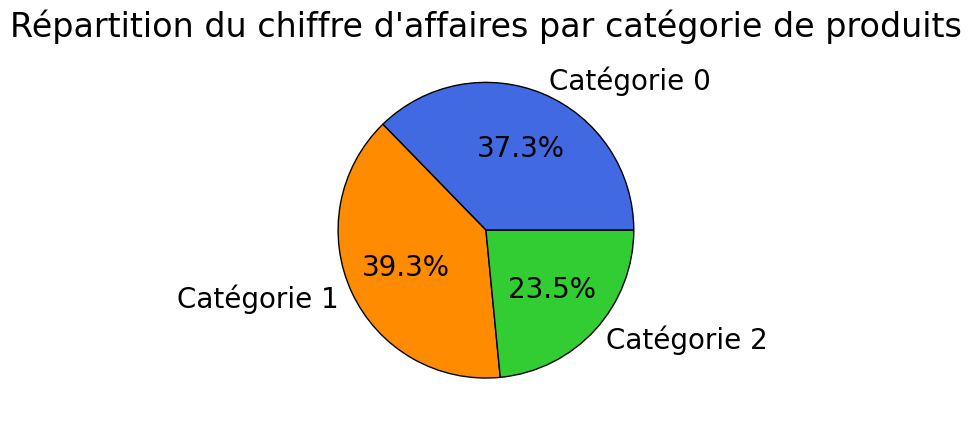

In [51]:
plt.rcParams['font.size'] = 20
plt.figure()
plt.title('Répartition du chiffre d\'affaires par catégorie de produits')
slices = [ca_categ0, ca_categ1, ca_categ2]
labels = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2']
colors = ['royalblue', 'darkorange', 'limegreen']
plt.pie(slices, labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig('Répartition_CA_categs.png', bbox_inches='tight')
plt.show()

### <a name="C16">4.2.3 L'evolution temporelle de CA & CA par catégorie</a> 

In [52]:
print(df_final['date'].min())
print(df_final['date'].max())

2021-03-01 00:01:07.843138
2023-02-28 23:58:30.792755


In [53]:
#J'affiche la date en jour
df_final['date']=df_final['date'].astype('datetime64[D]')
df_final['date']

0        2022-05-20
1        2022-06-18
2        2023-02-08
3        2021-04-20
4        2022-03-15
            ...    
679106   2021-05-15
679107   2021-11-08
679108   2021-06-01
679109   2022-10-18
679110   2021-12-18
Name: date, Length: 679111, dtype: datetime64[ns]

In [54]:
df_final

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986
1,0_1627,2022-06-18,s_225494,c_103,3.99,0.0,f,1986
2,0_1104,2023-02-08,s_338755,c_103,13.21,0.0,f,1986
3,0_1390,2021-04-20,s_23078,c_103,19.37,0.0,f,1986
4,0_1547,2022-03-15,s_179629,c_103,8.99,0.0,f,1986
...,...,...,...,...,...,...,...,...
679106,0_1509,2021-05-15,s_34762,c_8114,4.99,0.0,m,1962
679107,1_152,2021-11-08,s_116675,c_240,11.06,1.0,m,1998
679108,2_207,2021-06-01,s_42418,c_305,50.99,2.0,f,1996
679109,1_521,2022-10-18,s_284060,c_305,22.99,1.0,f,1996


In [55]:
#J'affiche le chiffre d'affaire journalier
ca_jour=df_final[['date','price']].groupby (['date']).sum().reset_index()
ca_jour.head()

,date,price
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37


In [56]:
#J'affiche le chiffre d'affaire journalier par catégorie
ca_jour_categ=df_final[['price','date','categ']].groupby(["date","categ"]).sum().reset_index()
ca_jour_categ.head()

,date,categ,price
0,2021-03-01,0.0,6262.65
1,2021-03-01,1.0,6811.53
2,2021-03-01,2.0,3491.04
3,2021-03-02,0.0,6718.27
4,2021-03-02,1.0,5627.15


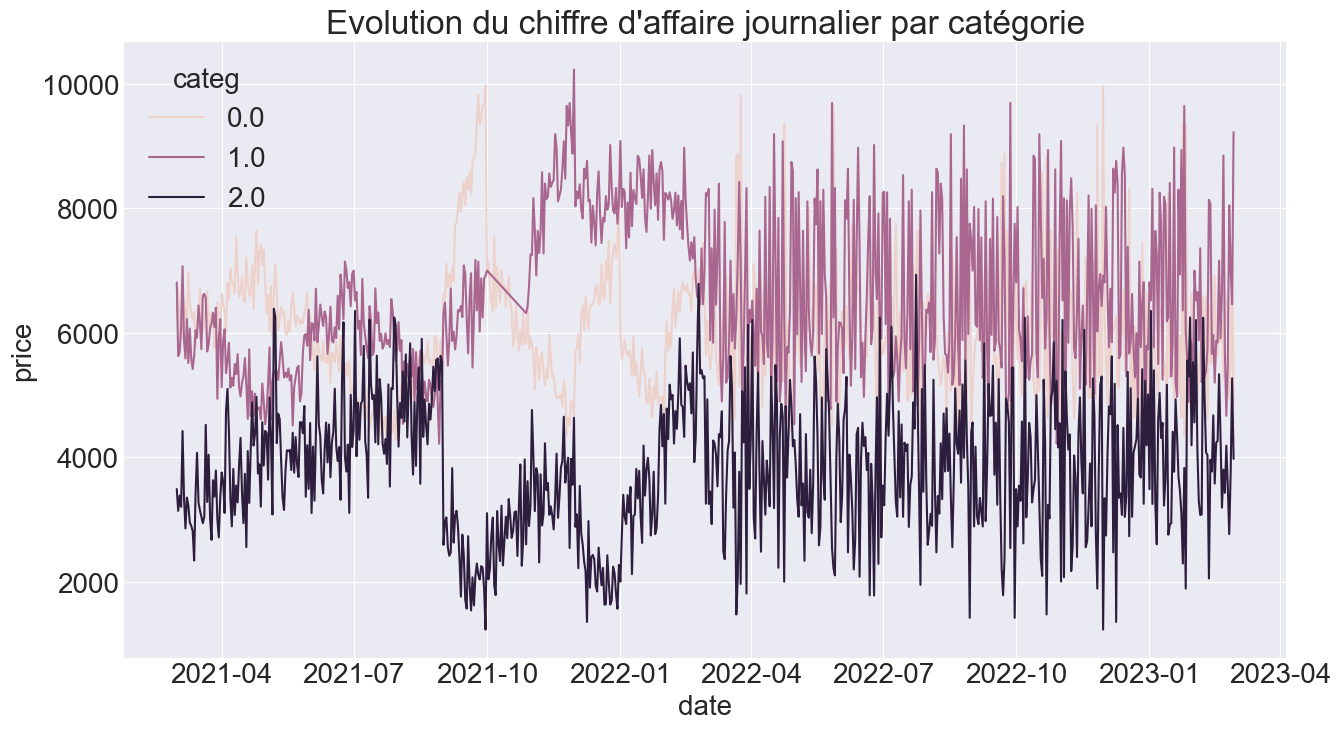

In [57]:
plt.rcParams['font.size'] = 20
plt.figure(figsize = (15,8))
plt.style.use('seaborn-darkgrid')
plt.title('Evolution du chiffre d\'affaire journalier par catégorie')
plt.ylabel('price')
plt.xlabel('date')
plt.legend(['Total', 'Cat.0', 'Cat.1', 'Cat.2'])
sns.lineplot(data=ca_jour_categ,x='date',y='price',hue='categ')
plt.savefig('Evolution_CA_Cat.png', bbox_inches='tight')
plt.show()

- **On remarque une baisse du chiffre d'affaire en octobre sur la categorie 1,arret de vente?!**

### <a name="C17">4.2.4 Saisonnalité du chiffre d'affaire et tendance globale</a> 

In [58]:
# Création d'un dataframe specifique par catégorie avec fonction d'agregation:
df_final2=ca_jour_categ.pivot_table(index='date',columns='categ',values='price',aggfunc='sum').reset_index()
df_final2

categ,date,0.0,1.0,2.0
0,2021-03-01,6262.65,6811.53,3491.04
1,2021-03-02,6718.27,5627.15,3141.03
2,2021-03-03,6121.03,5691.41,3386.25
3,2021-03-04,5891.48,6098.98,3205.61
4,2021-03-05,5975.97,7071.21,4424.19
...,...,...,...,...
725,2023-02-24,6197.92,5471.07,3538.90
726,2023-02-25,4942.69,8050.61,2767.95
727,2023-02-26,5522.90,7009.09,3772.73
728,2023-02-27,7437.43,6461.76,5271.62


In [59]:
# Decomposition en moyenne mobile sur sept jours:
df_final2.columns=['date','c0','c1','c2']
df_final2['c0']=df_final2['c0'].rolling(7).mean()
df_final2['c1']=df_final2['c1'].rolling(7).mean()
df_final2['c2']=df_final2['c2'].rolling(7).mean()
df_final2=pd.melt(frame=df_final2,id_vars='date',var_name='categ',value_name='price')
df_final2

,date,categ,price
0,2021-03-01,c0,NaN
1,2021-03-02,c0,NaN
2,2021-03-03,c0,NaN
3,2021-03-04,c0,NaN
4,2021-03-05,c0,NaN
...,...,...,...
2185,2023-02-24,c2,3974.147143
2186,2023-02-25,c2,3607.191429
2187,2023-02-26,c2,3528.142857
2188,2023-02-27,c2,3825.195714


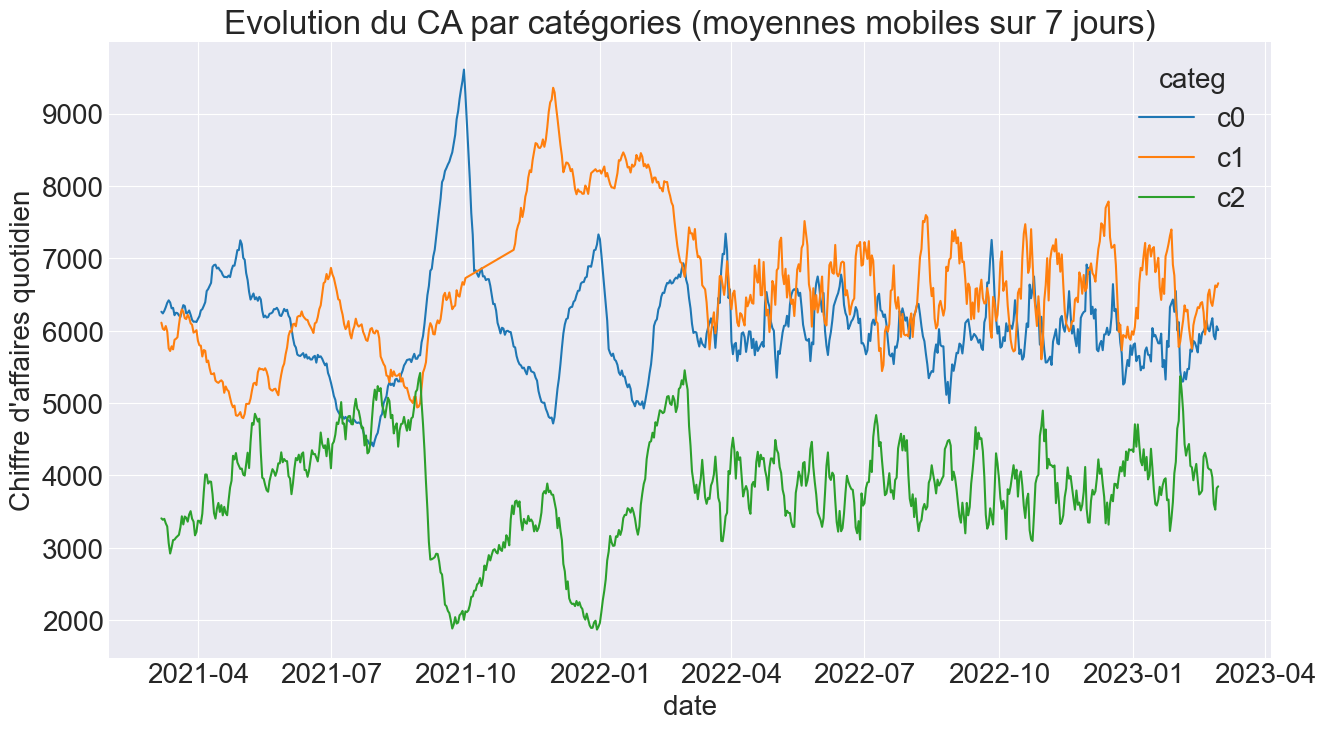

In [60]:
plt.rcParams['font.size'] = 20
plt.figure(figsize = (15,8))
plt.style.use('seaborn-darkgrid')
plt.title('Evolution du CA par catégories (moyennes mobiles sur 7 jours)')
plt.ylabel('Chiffre d\'affaires quotidien')
plt.xlabel('date')
colors = ['royalblue', 'darkorange', 'limegreen']
plt.legend(['Total', 'Cat.0', 'Cat.1', 'Cat.2'])
sns.lineplot(data=df_final2,x='date',y='price',hue='categ')
plt.savefig('Evolution_CA_Cat.png', bbox_inches='tight')
plt.show()

- **Diminution du CA en octobre 2021, pourquoi?
  des produits de la catégorie 1 a prix nul en octobre 2021. arret de vente ?!**

In [61]:
ca_jour_categ['mois']=ca_jour_categ['date'].values.astype('datetime64[M]')
ca_jour_categ

,date,categ,price,mois
0,2021-03-01,0.0,6262.65,2021-03-01
1,2021-03-01,1.0,6811.53,2021-03-01
2,2021-03-01,2.0,3491.04,2021-03-01
3,2021-03-02,0.0,6718.27,2021-03-01
4,2021-03-02,1.0,5627.15,2021-03-01
...,...,...,...,...
2159,2023-02-27,1.0,6461.76,2023-02-01
2160,2023-02-27,2.0,5271.62,2023-02-01
2161,2023-02-28,0.0,4901.86,2023-02-01
2162,2023-02-28,1.0,9226.25,2023-02-01


In [62]:
ca_mois_categ=ca_jour_categ[['mois','categ','price']].groupby(['mois','categ']).sum().reset_index()
ca_mois_categ

,mois,categ,price
0,2021-03-01,0.0,193629.17
1,2021-03-01,1.0,186974.17
2,2021-03-01,2.0,101837.27
3,2021-04-01,0.0,205222.46
4,2021-04-01,1.0,156138.35
...,...,...,...
67,2023-01-01,1.0,210104.41
68,2023-01-01,2.0,126153.08
69,2023-02-01,0.0,162457.00
70,2023-02-01,1.0,180347.24


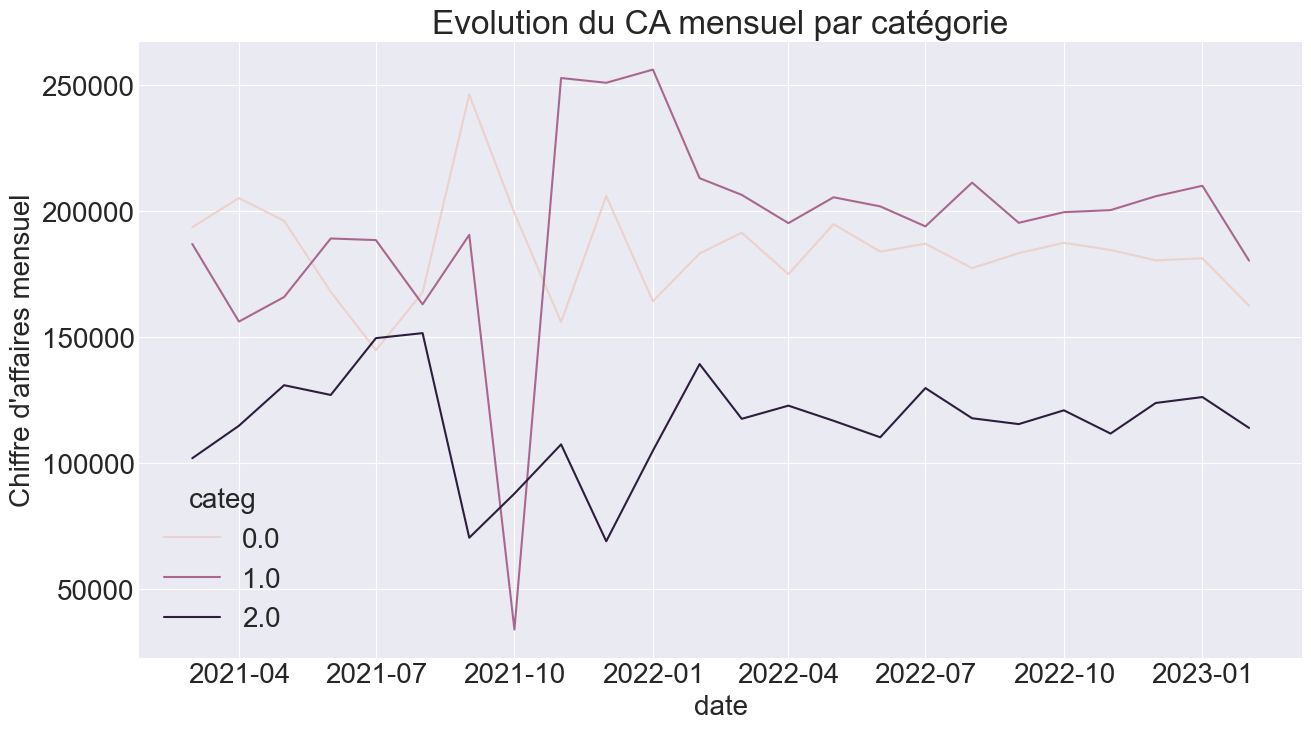

In [63]:
plt.rcParams['font.size'] =20
plt.figure(figsize = (15,8))
plt.style.use('seaborn-darkgrid')
plt.title('Evolution du CA mensuel par catégorie')
plt.ylabel('Chiffre d\'affaires mensuel')
plt.xlabel('date')
colors = ['royalblue', 'darkorange', 'limegreen']
plt.legend(['Total', 'Cat.0', 'Cat.1', 'Cat.2'])
sns.lineplot(data=ca_mois_categ,x='mois', y='price',hue='categ')
plt.savefig('Evolution_CA_Cat.png', bbox_inches='tight')
plt.show()

### <a name="C18">4.2.5 Zoom sur les références:Les tops et les flops</a> 

In [64]:
# Meilleures et pires ventes:
nbr_ventes_produit= ventes_final.groupby(["id_prod"]).count()

print("Références des produis les plus vendues")
print(nbr_ventes_produit.nlargest(10,'price'))
print("Références des produis les moins vendues")
print(nbr_ventes_produit.nsmallest(10,'price'))


Références des produis les plus vendues
         date  session_id  client_id  price  categ   sex  birth
id_prod                                                        
1_369    2252        2252       2252   2252   2252  2252   2252
1_417    2189        2189       2189   2189   2189  2189   2189
1_414    2180        2180       2180   2180   2180  2180   2180
1_498    2128        2128       2128   2128   2128  2128   2128
1_425    2096        2096       2096   2096   2096  2096   2096
1_403    1960        1960       1960   1960   1960  1960   1960
1_412    1951        1951       1951   1951   1951  1951   1951
1_413    1945        1945       1945   1945   1945  1945   1945
1_406    1939        1939       1939   1939   1939  1939   1939
1_407    1935        1935       1935   1935   1935  1935   1935
Références des produis les moins vendues
         date  session_id  client_id  price  categ  sex  birth
id_prod                                                       
0_1151      1           1

In [65]:
# Meilleures et pires ventes:
nbr_ventes_produit= df_final.groupby(["id_prod"])["price"].sum()
print("Références les plus vendues")
print(nbr_ventes_produit.nlargest(10))
print("Références les moins vendues")
print(nbr_ventes_produit.nsmallest(10))


Références les plus vendues
id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    54356.25
1_369    54025.48
2_110    53846.25
2_39     53060.85
2_166    52449.12
Name: price, dtype: float64
Références les moins vendues
id_prod
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_1601    1.99
0_541     1.99
0_807     1.99
0_1728    2.27
0_1498    2.48
0_898     2.54
0_1840    2.56
Name: price, dtype: float64


- **En terme du nombre des ventes:Les 10 best sellers appartiennent tous à la catégorie '1' tandis que les dix pires ventes appartiennent à la catégorie '0'.**
- **En terme du CA généré:Les 10 best sellers appartiennent à la catégorie '2' tandis que les dix pires ventes appartiennent à la catégorie '0'.** 

## <a name="C19"><font color='indianred'>4.3 Analyse des produits</a> 

### <a name="C20"> 4.3.1 Prix de produits par catégorie </a>

In [66]:
products_df.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


**Bilan**

- Les produits vendus ont des prix entre 0.62 et 300 euros.
- 75% des produits vendus sont au prix moins que 19 euros.
- Les clients en ligne ont des ages entre 19 et 94 ans

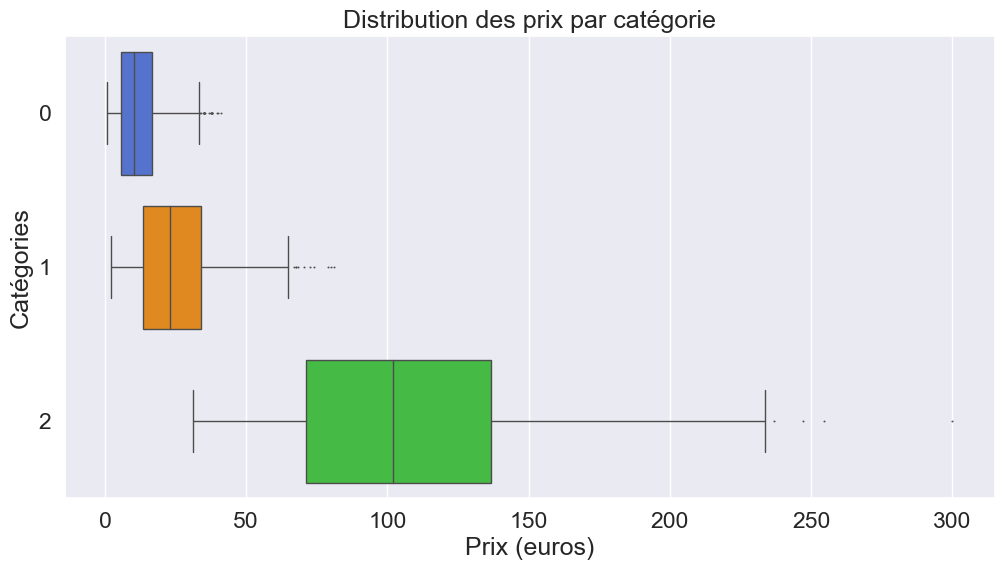

In [67]:
plt.figure(figsize=(12,6))
colors=['royalblue', 'darkorange', 'limegreen']
sns.set(font_scale=1.5)
ax = sns.boxplot(x=products_df.price, y=products_df.categ, orient='h', palette=colors, flierprops = dict(markersize = 0.5), linewidth=1)
ax.set(xlabel='Prix (euros)', ylabel='Catégories', title='Distribution des prix par catégorie')
plt.savefig('Boxplot Prix-Categ.png', bbox_inches='tight')
plt.show()

### <a name="C21"> 4.3.2 Répartition de nombre de produits par catégorie</a>

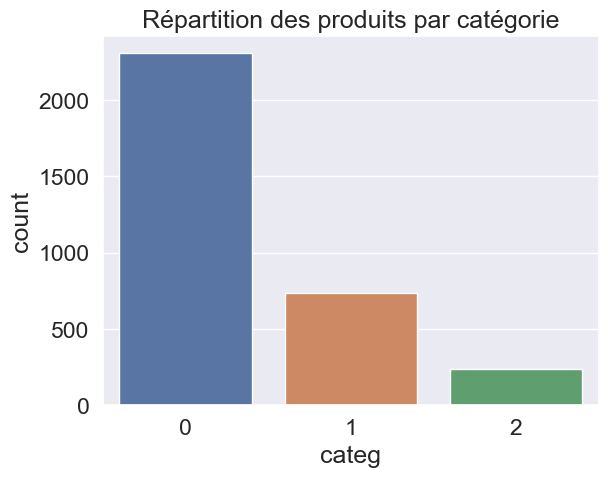

nombre de produits dans chaque catégorie 0.0    415459
1.0    227169
2.0     36483
Name: categ, dtype: int64


In [68]:
plt.rcParams['font.size'] = 20
plt.figure()
plt.title("Répartition des produits par catégorie")
labels = ['0','1','2']
colors = ['royalblue', 'darkorange', 'limegreen']
sns.countplot(data=products_df,x="categ")
plt.savefig("Pie Nproduits-categ.png", bbox_inches='tight')
plt.show()
print('nombre de produits dans chaque catégorie',df_final.categ.value_counts())

**Autrement**

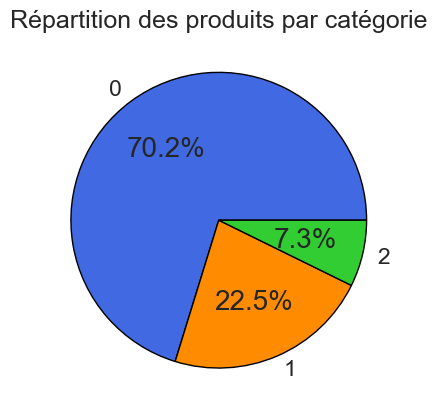

nombre de produits dans chaque catégorie 0.0    415459
1.0    227169
2.0     36483
Name: categ, dtype: int64


In [69]:
plt.rcParams['font.size'] = 20
plt.figure()
plt.title("Répartition des produits par catégorie")
labels = ['0','1','2']
colors = ['royalblue', 'darkorange', 'limegreen']
plt.pie(products_df.categ.value_counts(), labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig("Pie Nproduits-categ.png", bbox_inches='tight')
plt.show()
print('nombre de produits dans chaque catégorie',df_final.categ.value_counts())

### <a name="C22"> 4.3.3 Répartition du CA par produit</a>

In [70]:
ca_produit= pd.DataFrame(df_final.groupby('id_prod') ['price'].sum())
ca_produit

,price
id_prod,
0_0,4657.50
0_1,5352.13
0_10,394.90
0_100,61.80
0_1000,2954.88
...,...
2_95,395.96
2_96,28650.18
2_97,2092.87


# Courbe de Lorenz

In [71]:
# Calcul de lorenz
def lorenz_gini(varrs):
  #Tri des individus dans l'ordre croissant des valeurs de la variable, 
  #Calcul de la somme cumulée et normalisation en divisant par la somme des observations
  n=len(varrs)
  lorenz= np.cumsum(np.sort(varrs))/ varrs.sum()
  lorenz = np.append([0],lorenz)
  #Calcul de l'indice de Gini
  # Surface sous la courbe de Lorenz. 
  # Le premier segment (lorenz[0]) est à moitié en dessous de 0,
  # on le coupe donc en 2, 
  # on fait de même pour le dernier segment lorenz[-1] 
  # qui est à moitié au dessus de 1.
  AUC=(lorenz.sum()-lorenz[-1]/2-lorenz[0]/2)/n
  # surface entre la première bissectrice et le courbe de Lorenz
  S= 0.5 - AUC
  gini = 2*S
  return lorenz,gini

# Plot Lorenz
def graph_lorenz(varrs,title,labelx,labely,savenome):
  # Calcul de lorenz sur le variable varrs:
  lorenz_varrs,gini_varrs=lorenz_gini(varrs)
  plt.figure(figsize=(12, 5))
  n=len(varrs)
  xaxis= np.linspace(0-1/n,1+1/n,len(lorenz_varrs))
  plt.plot(xaxis,lorenz_varrs,drawstyle='steps-post',color='black',label='Lorenz')
  plt.fill_between(np.linspace(0,1,len(lorenz_varrs)) ,lorenz_varrs , color='#777ecd')
  plt.plot([0, 1], [0, 1], 'g-', lw=2, label='Distribution égalitaire')
  medial = lorenz_varrs[(lorenz_varrs < 0.5)].size / lorenz_varrs.size
  plt.plot([0,medial],[0.5,0.5], color='r', linewidth=2,label='Medial')
  plt.plot([medial,medial],[0,0.5], color='r', linewidth=2)

  plt.title(title)
  plt.xlabel(labelx)
  plt.ylabel(labely)
  plt.legend(loc="best")

  plt.savefig(savenome)
  plt.show()

  #Mesure de l'aire entre la 1ere bissectrice et la courbe de Lorenz 
  print('Coefficient de Gini=', round(gini_varrs,2))  


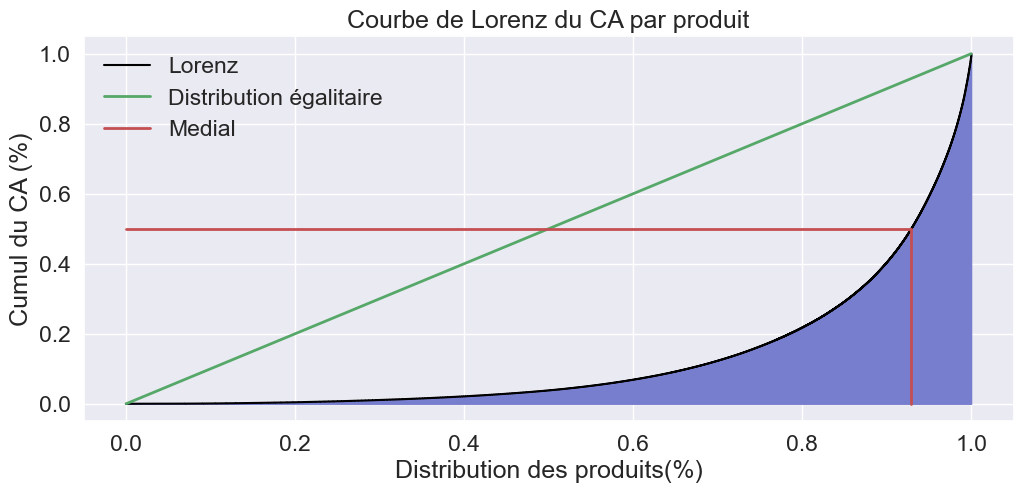

Coefficient de Gini= 0.74


In [95]:
graph_lorenz(varrs=ca_produit.price,title="Courbe de Lorenz du CA par produit",labelx="Distribution des produits(%)"
,labely="Cumul du CA (%)",savenome="lorenz_CA_produit.png")

In [96]:
#Top 10 des produits 
classement_produits=ca_produit.sort_values(by='price',ascending=False)
classement_produits.head(10)

,price
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


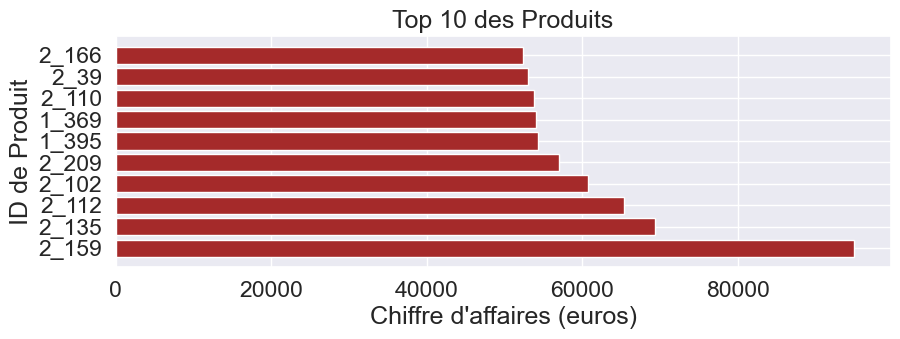

In [97]:
top10_produits = classement_produits.head(10)
top10_produits = top10_produits.reset_index()
plt.figure(figsize=(10,3))
plt.title('Top 10 des Produits')
plt.xlabel("Chiffre d'affaires (euros)")
plt.ylabel('ID de Produit')
plt.barh(top10_produits.id_prod,top10_produits.price, color='brown')
plt.savefig('Top10 produits par CA.png', bbox_inches='tight')
plt.show()

### <a name="C23"> 4.3.4 Nombre de ventes par produit</a>

In [98]:
# Création d'un df des produits et le nombre de leurs achats
df_produits_nachats=df_final[['id_prod', 'session_id']].groupby(['id_prod'], as_index=False).count()
df_produits_nachats=df_produits_nachats.rename(columns={'session_id':'nb_achats_prod'})
df_produits_nachats.head()

nb_achat_produit = df_produits_nachats['nb_achats_prod'].values

In [99]:
#Top 10 des produits par nombre d'achats
classement_produits_nb_achats=df_produits_nachats.sort_values(by='nb_achats_prod',ascending=False)
classement_produits_nb_achats.head(10)

,id_prod,nb_achats_prod
2591,1_369,2252
2644,1_417,2189
2641,1_414,2180
2733,1_498,2128
2653,1_425,2096
2629,1_403,1960
2639,1_412,1951
2640,1_413,1945
2632,1_406,1939
2633,1_407,1935


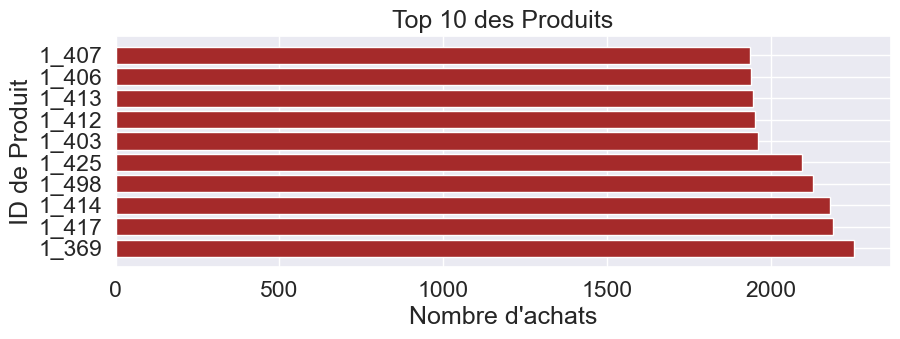

In [100]:
top10_produits_nb_achats =classement_produits_nb_achats.head(10)
top10_produits_nb_achats  = top10_produits_nb_achats .reset_index()
plt.figure(figsize=(10,3))
plt.title('Top 10 des Produits')
plt.xlabel("Nombre d'achats")
plt.ylabel('ID de Produit')
plt.barh(top10_produits_nb_achats.id_prod,top10_produits_nb_achats.nb_achats_prod, color='brown')
plt.savefig("Top10 produits par Nombre d'Achat.png", bbox_inches='tight')
plt.show()

### <a name="C24"> 4.3.5 Répartition du chiffre d'affaire généré par nombre de produits achetés</a>

In [101]:
CA_produits = pd.DataFrame(df_final.groupby('id_prod') ['price'].sum())
CA_produits.head()

,price
id_prod,
0_0,4657.50
0_1,5352.13
0_10,394.90
0_100,61.80
0_1000,2954.88


In [102]:
#Top 10 des produits par contribution to CA
classement_produits=CA_produits.sort_values(by='price',ascending=False)
classement_produits.head(10)

,price
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


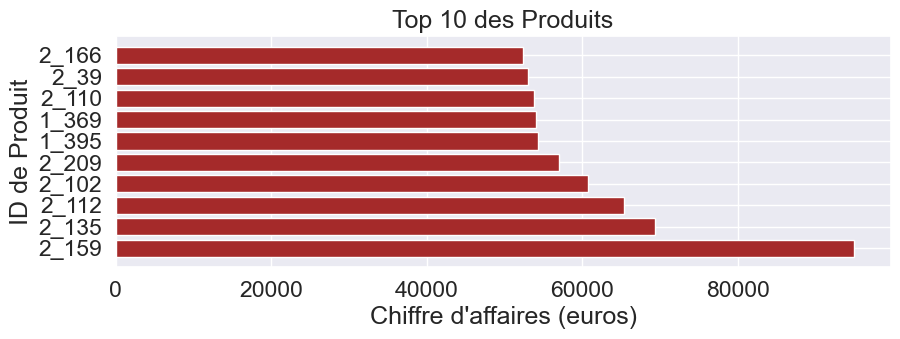

In [103]:
top10_produits = classement_produits.head(10)
top10_produits = top10_produits.reset_index()
plt.figure(figsize=(10,3))
plt.title('Top 10 des Produits')
plt.xlabel("Chiffre d'affaires (euros)")
plt.ylabel('ID de Produit')
plt.barh(top10_produits.id_prod,top10_produits.price, color='brown')
plt.savefig('Top10 produits par CA.png', bbox_inches='tight')
plt.show()

## <a name="C25"><font color='indianred'>4.4 Analyse des clients</a>

### <a name="C26"> 4.4.1 Répartition par genre de clients</a>

In [104]:
# Repartition par genres des acheteurs:
repartition_genre = customers_df.groupby(["sex"])["client_id"].count()
print(repartition_genre)

sex
f    4491
m    4132
Name: client_id, dtype: int64


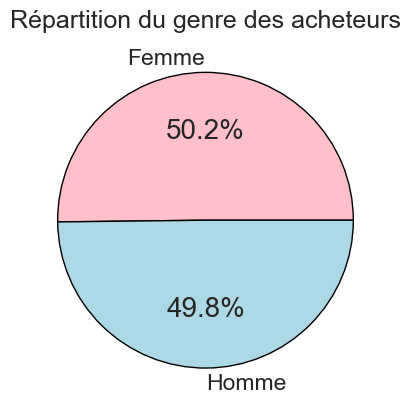

In [105]:
plt.rcParams['font.size'] = 20
plt.figure()
plt.title('Répartition du genre des acheteurs')
labels = ['Femme','Homme']
colors = ['pink','lightblue']

plt.pie(df_final.sex.value_counts(), labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig('Pie clients sex.png', bbox_inches='tight')
plt.show()

### <a name="C27"> 4.4.2 Répartition des clients par  classe d'âge</a>

In [106]:
customers_df.describe()

,birth,age
count,8623.000000,8623.000000
mean,1978.280877,44.719123
std,16.919535,16.919535
min,1929.000000,19.000000
25%,1966.000000,31.000000
50%,1979.000000,44.000000
75%,1992.000000,57.000000
max,2004.000000,94.000000


In [107]:
#Création d'une colonne 'Age'
customers_df['age'] =2023 - customers_df['birth']
customers_df['age'].sort_values()

1920    19
7318    19
1045    19
1049    19
1053    19
        ..
1086    93
3994    93
4569    94
2491    94
418     94
Name: age, Length: 8623, dtype: int64

In [108]:
# Tranches d'âges
customers_df['classe_age'] = '19-30'
customers_df['classe_age'].loc[customers_df[customers_df['age']>=30].index] = '30-50'
customers_df['classe_age'].loc[customers_df[customers_df['age']>=50].index] = '+50'

customers_df.tail(10)

C:\Users\MAHJOUB Samira\AppData\Local\Temp\ipykernel_23616\2744966665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['classe_age'].loc[customers_df[customers_df['age']>=30].index] = '30-50'
C:\Users\MAHJOUB Samira\AppData\Local\Temp\ipykernel_23616\2744966665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['classe_age'].loc[customers_df[customers_df['age']>=50].index] = '+50'


,client_id,sex,birth,age,classe_age
8613,c_4477,f,1999,24,19-30
8614,c_4421,m,1960,63,+50
8615,c_2791,m,2004,19,19-30
8616,c_8291,m,2003,20,19-30
8617,c_5755,m,1990,33,30-50
8618,c_7920,m,1956,67,+50
8619,c_7403,f,1970,53,+50
8620,c_5119,m,1974,49,30-50
8621,c_5643,f,1968,55,+50
8622,c_84,f,1982,41,30-50


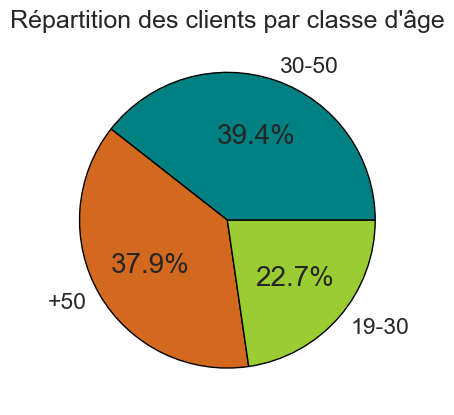

In [109]:
plt.rcParams['font.size'] =20
plt.figure()
plt.title('Répartition des clients par classe d\'âge')
labels = ['30-50','+50','19-30']
colors = ['teal','chocolate','yellowgreen']

plt.pie(customers_df.classe_age.value_counts(), labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig("Pie clients par Classe d'âge.png", bbox_inches='tight')
plt.show()

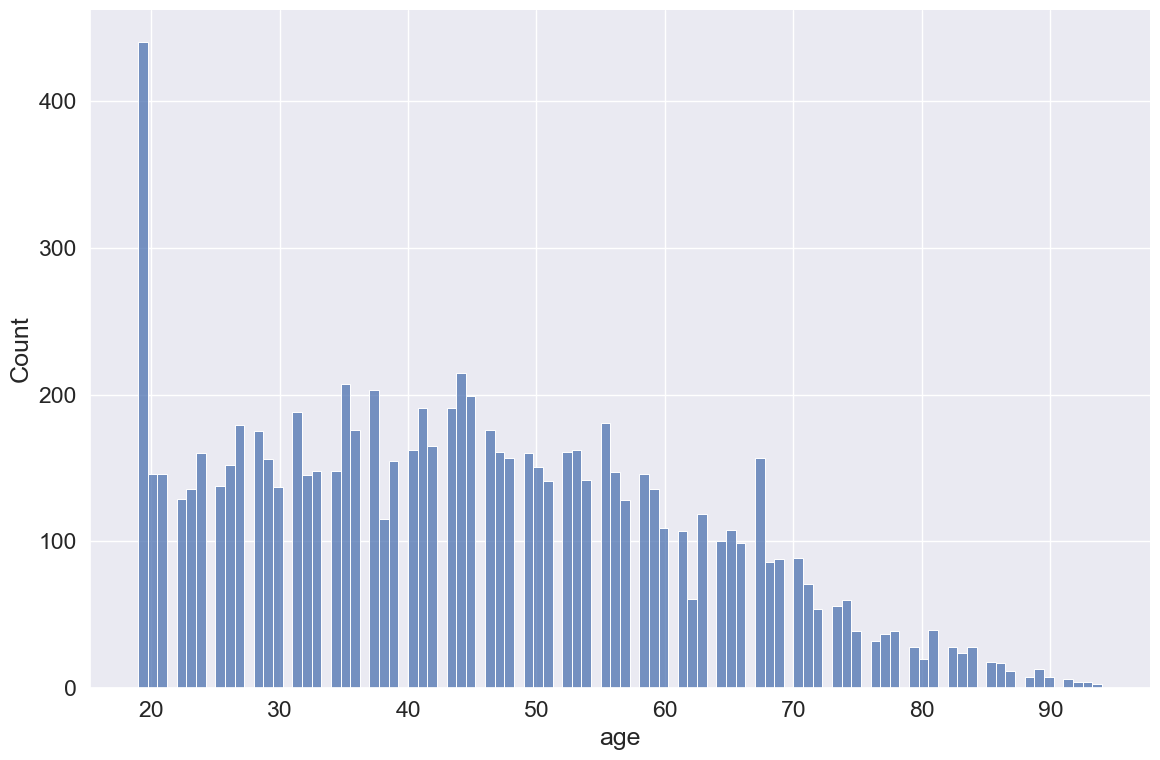

In [110]:
#Distribution des ages
sns.displot(data=customers_df,x='age',bins=100,height=8,aspect=1.5)

### <a name="C28"> 4.4.3 L'âge de clients par genre</a>

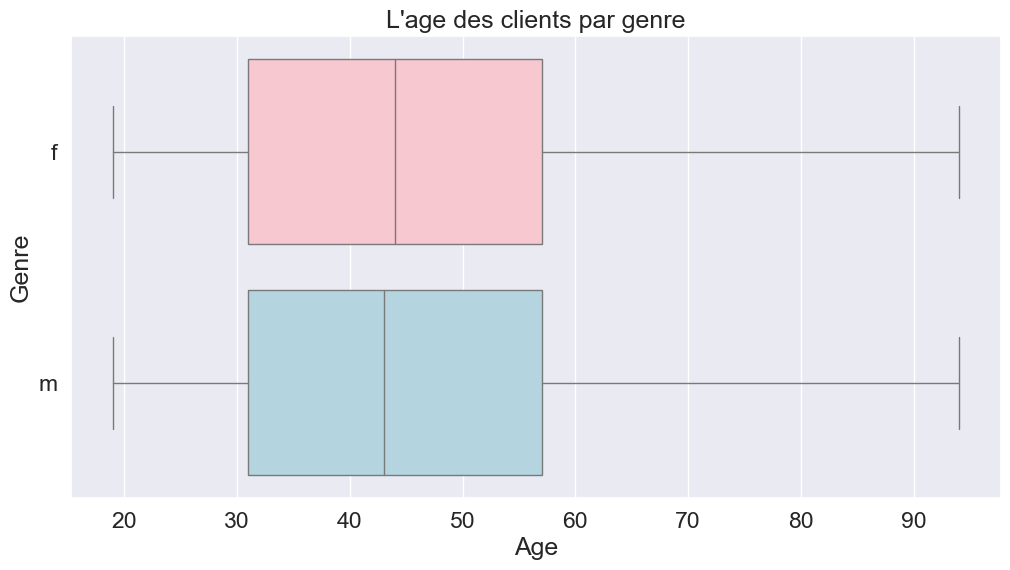

In [111]:
plt.rcParams['font.size'] =20
plt.figure(figsize=(12,6))
colors=['pink','lightblue']
sns.set(font_scale=1.5)
ax = sns.boxplot(x=customers_df.age, y=customers_df.sex, orient='h', palette=colors, flierprops = dict(markersize = 0.5), linewidth=1)
ax.set(xlabel='Age', ylabel='Genre', title='L\'age des clients par genre')
plt.savefig('Boxplot sexe_age.png', bbox_inches='tight')
plt.show()

### <a name="C29"> 4.4.4 Répartition du CA par client</a>

In [114]:
#Je calcule le chiffre d'affaire par client
ca_client=df_final.groupby("client_id")["price"].sum()
ca_client

client_id
c_1        558.18
c_10      1353.60
c_100      254.85
c_1000    2261.89
c_1001    1812.86
           ...   
c_995      189.41
c_996     1625.58
c_997     1490.01
c_998     2779.88
c_999      701.40
Name: price, Length: 8600, dtype: float64

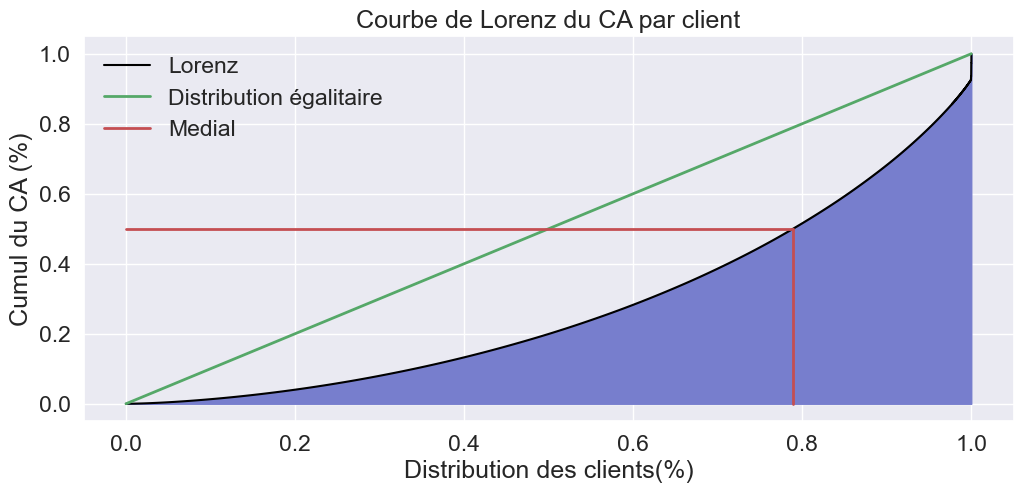

Coefficient de Gini= 0.45


In [116]:
graph_lorenz(varrs=ca_client,title="Courbe de Lorenz du CA par client",labelx="Distribution des clients(%)"
,labely="Cumul du CA (%)",savenome="lorenz_CA_client.png")

In [117]:
#Top 10 des clients
classement_clients=ca_client.sort_values(ascending=False)
classement_clients.head(10)

client_id
c_1609    324033.35
c_4958    289760.34
c_6714    153598.92
c_3454    113637.93
c_3263      5276.87
c_1570      5271.62
c_2899      5214.05
c_2140      5208.82
c_7319      5155.77
c_7959      5085.45
Name: price, dtype: float64

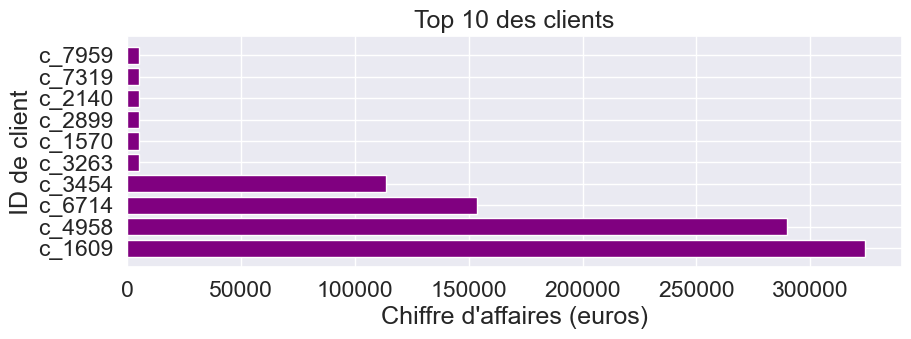

In [118]:
top10_clients = classement_clients.head(10)
top10_clients = top10_clients.reset_index()
plt.figure(figsize=(10,3))
plt.title('Top 10 des clients')
plt.xlabel("Chiffre d'affaires (euros)")
plt.ylabel('ID de client')
plt.barh(top10_clients.client_id,top10_clients.price, color='purple')
plt.savefig('Top10 clients.png', bbox_inches='tight')
plt.show()

### <a name="C30"> 4.4.5  Répartition du CA par genre de clients acheteurs</a>

In [119]:
df_final['sex'].unique()

array(['f', 'm'], dtype=object)

In [120]:
ventes_femme = df_final.loc[df_final['sex'] == 'f']
ventes_homme = df_final.loc[df_final['sex'] == 'm']


CA_f = ventes_femme['price'].sum()
CA_h = ventes_homme['price'].sum()


print('Le chiffre d\'affaires pour les clients hommes {:.2f}€'.format(CA_h))
print('Le chiffre d\'affaires pour les clients femmes{:.2f}€'.format(CA_f))

part_CA_f=(CA_f/ca_total)*100
part_CA_h=(CA_h/ca_total)*100

print('Le chiffre d\'affaires des clients de sexe féminin: {:.2f}%'.format(part_CA_f))
print('Le chiffre d\'affaires des clients de sexe masculin: {:.2f}%'.format(part_CA_h))

Le chiffre d'affaires pour les clients hommes 5994045.55€
Le chiffre d'affaires pour les clients femmes5859683.13€
Le chiffre d'affaires des clients de sexe féminin: 49.43%
Le chiffre d'affaires des clients de sexe masculin: 50.57%


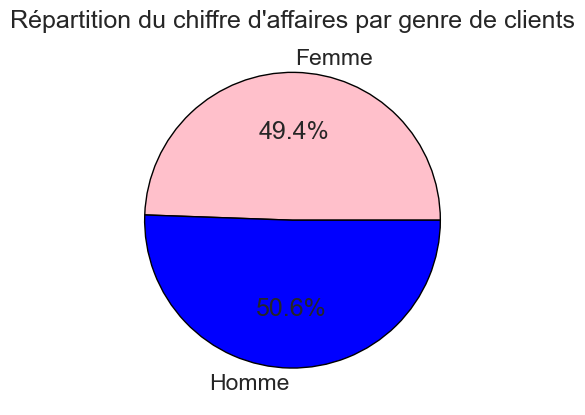

In [121]:
plt.figure()
plt.title('Répartition du chiffre d\'affaires par genre de clients')
slices = [CA_f, CA_h]
labels = ['Femme','Homme']
colors = [ 'pink','blue']
plt.pie(slices, labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig('Répartition_CA_genre.png', bbox_inches='tight')
plt.show()

# <a name="C31"> 5. Analyse bi-variées des indicateurs</a>

- **Analyse de clients: garder les clients particuliers (éliminer les 4 clients de top de CA qui sont probablement des entreprises ou des institutions)**

In [122]:
top10_clients.head()

,client_id,price
0,c_1609,324033.35
1,c_4958,289760.34
2,c_6714,153598.92
3,c_3454,113637.93
4,c_3263,5276.87


In [123]:
#J'elimine les 4 gros clients
list_top4_clients=top10_clients.client_id[0:4].tolist()
filtre_top4_clients= df_final['client_id'].isin(list_top4_clients)
df_clients_particuliers=df_final[~filtre_top4_clients ]
df_clients_particuliers

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986
1,0_1627,2022-06-18,s_225494,c_103,3.99,0.0,f,1986
2,0_1104,2023-02-08,s_338755,c_103,13.21,0.0,f,1986
3,0_1390,2021-04-20,s_23078,c_103,19.37,0.0,f,1986
4,0_1547,2022-03-15,s_179629,c_103,8.99,0.0,f,1986
...,...,...,...,...,...,...,...,...
679106,0_1509,2021-05-15,s_34762,c_8114,4.99,0.0,m,1962
679107,1_152,2021-11-08,s_116675,c_240,11.06,1.0,m,1998
679108,2_207,2021-06-01,s_42418,c_305,50.99,2.0,f,1996
679109,1_521,2022-10-18,s_284060,c_305,22.99,1.0,f,1996


In [124]:
#Dataframe sans les 4 gros clients 
df_final_client= df_final.drop(filtre_top4_clients.index).reset_index(drop=True)
df_final_client

,id_prod,date,session_id,client_id,price,categ,sex,birth


In [125]:
df_clients_particuliers

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986
1,0_1627,2022-06-18,s_225494,c_103,3.99,0.0,f,1986
2,0_1104,2023-02-08,s_338755,c_103,13.21,0.0,f,1986
3,0_1390,2021-04-20,s_23078,c_103,19.37,0.0,f,1986
4,0_1547,2022-03-15,s_179629,c_103,8.99,0.0,f,1986
...,...,...,...,...,...,...,...,...
679106,0_1509,2021-05-15,s_34762,c_8114,4.99,0.0,m,1962
679107,1_152,2021-11-08,s_116675,c_240,11.06,1.0,m,1998
679108,2_207,2021-06-01,s_42418,c_305,50.99,2.0,f,1996
679109,1_521,2022-10-18,s_284060,c_305,22.99,1.0,f,1996


## <a name="C32"> <font color='indianred'>5.1 Lien entre le genre et les catégories des livres achetés</a>

- **Question posée: La categorie des livres achetés depend-elle du genre du client?**
- **Réponses possibles: Oui/Non**

- **H0 : la catégorie ne dépend pas du genre du client**
- **H1 : la catégorie dépend du genre du client**



- **Choix du test paramétrique appropié:**
- **ici il s'agit de tests d'assiociation entre deux variables qualitatives ce qui explique notre choix de test parametrique de khi2 sur un tableau d contingence**


In [126]:
# Table de contingence pour Chi²:
categ_sex = pd.crosstab(df_final["sex"],df_final["categ"])
print(categ_sex)

categ     0.0     1.0    2.0
sex                         
f      206103  114899  17283
m      209356  112270  19200


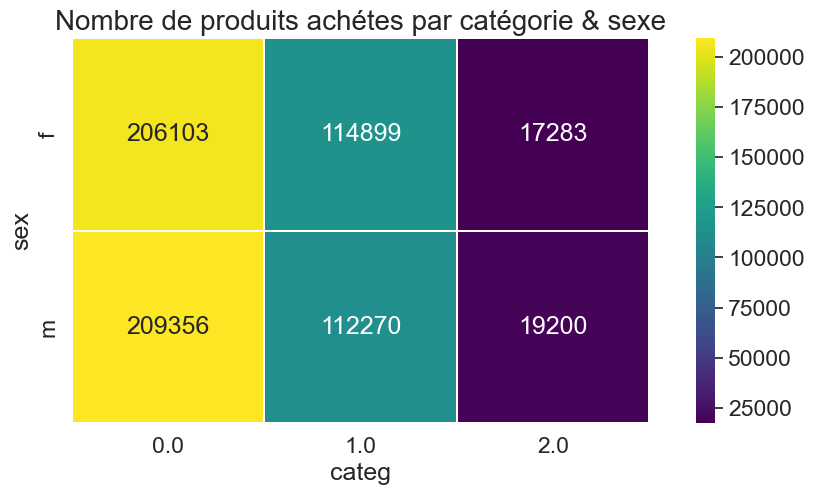

In [127]:
# Heat map (carte de chaleur) pour identifier les cellules les plus influantes sur le Chi²:
plt.figure(figsize=(12, 5))
sns.heatmap(categ_sex,annot=True, fmt='g',square=True,cmap="viridis", linewidths=0.1)
plt.title('Nombre de produits achétes par catégorie & sexe',fontsize=20)
plt.savefig("heatmap sexe_categ.png")
plt.show()

- **La map nous confirme qu'il n'y a que peu de variations entre genres au sein des catégories**
- **L'achat d'une catégorie en particulier ne dépenderait donc pas du genre de l'acheteur.**

- **Chi-2**

In [128]:
#Calcul de la p-value avec le test du Chi-deux et avec un seuil de probabilité alpha=0.05
#Le nombre de degré de liberté (dof) = (nombre de lignes – 1) X (nombre de colonnes – 1)
#Affichage des valeurs de fréquences attendues expected
# Chi²:
chi2, pval, dof, expected = st.chi2_contingency(categ_sex.values)
print('Le khi-2 est de ', round(chi2,2))
print('La p-value est de ', pval)
print('Le nombre de degré de liberté est de ', dof)
print('Valeurs attendues : \n',expected)

Le khi-2 est de  147.12
La p-value est de  1.1310980597090762e-32
Le nombre de degré de liberté est de  2
Valeurs attendues : 
 [[206952.24759281 113159.50583189  18173.2465753 ]
 [208506.75240719 114009.49416811  18309.7534247 ]]


- **Bilan**
- **H0 : la catégorie ne dépend pas du genre du client**
- **H1 : la catégorie dépend du genre du client**

- **L'hypothèse nulle est ici est H0 : la catégorie ne dépend pas du genre du client. Dans tous les cas que l'on prenne un seuil à 5% (0,05) ou 1% (0,01), la p-value sera ici toujours très inférieure au seuil de significativité:p-value <5% (0,05)**

- **p-value < 0.05 alors on rejette H0, **il y aurait une dépendance entre le sexe et la catégorie des produits achetés: Les 2 variables sont corrélées**

## <a name="C33"> <font color='indianred'>5.2 Lien entre l' age des clients et le Montant total des achats(CA)</a>

- **Question posée: Le montant total des achats dépend_il du l'age des clients?**
- **Réponses possibles: Oui/Non**

- **H0 : le montant total des achats ne dépend pas du l'age du client**
- **H1 : le montant total des achats dépend du l'age du client**


- **Choix du test paramétrique appropié:**
- **En considérant les deux variables age & CA comme quantitatives,le choix du test ici est celui de pearson('Coefficient de corrélation linéaire de Pearson')**

In [129]:
df_clients_particuliers['age']=2023-df_clients_particuliers['birth']

C:\Users\MAHJOUB Samira\AppData\Local\Temp\ipykernel_23616\1971316171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients_particuliers['age']=2023-df_clients_particuliers['birth']


In [130]:
ca_par_client=df_clients_particuliers.groupby(['client_id','age']).agg({'price':sum}).reset_index()
ca_par_client

,client_id,age,price
0,c_1,68,558.18
1,c_10,67,1353.60
2,c_100,31,254.85
3,c_1000,57,2261.89
4,c_1001,41,1812.86
...,...,...,...
8591,c_995,68,189.41
8592,c_996,53,1625.58
8593,c_997,29,1490.01
8594,c_998,22,2779.88


In [131]:
#test de normalité:Tester si la distribution des variables suit la distribution de la loi Normale 
st.shapiro(ca_par_client['price'])

C:\Users\MAHJOUB Samira\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.903691828250885, pvalue=0.0)

- **En considérant les deux variables age & CA comme quantitatives, leur test de normalité (shapiro) s'avère une distribution normale de toutes les deux variables**

In [132]:
st.spearmanr(ca_par_client['age'],ca_par_client['price'])

SpearmanrResult(correlation=-0.1851392865536597, pvalue=3.78697439812248e-67)

<AxesSubplot:xlabel='age', ylabel='price'>

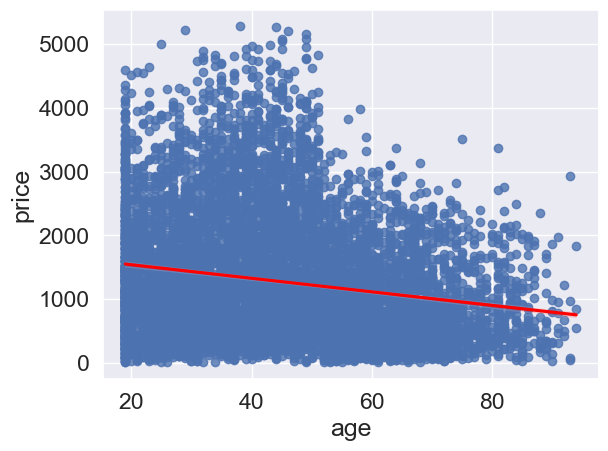

In [235]:
sns.regplot(data=ca_par_client,x='age',y='price',line_kws={'color':'red'})

- **Bilan**
- **Le coefficient de corrélation donné par le test varie entre -1 et 1 ; un coefficient de 0 implique qu’il n’y a pas de corrélation (différent de la pvalue ! ).**
- **Dans le cas du test de Spearman le coefficient donne une indication sur les relations monotones.**
- **On a p-value<alpha(0.05)= On rejette H0 : il ya une corrélation entre les deux variables** 
- **CA & age ont une distribution normale**
- **test Spearman:**
- **Une dépendance entre l'âge et le CA par client**
- **Corrélation -0.18%: plus le client est jeune plus le CA est important**

## <a name="C34"> <font color='indianred'>5.3 Lien entre l' age des clients et la fréquence d'achat</a>

- **Les 2 variables sont quantitatives. Question Posée : La frequence d'achats depend-elle de l'âge du client?**

- **Réponse: Oui/Non**

- **H0 :la frequence d'achats ne dépend pas de l'âge du client**

- **H1 :la frequence d'achats dépend de l'âge du client**

In [236]:
df_frequence_age=df_clients_particuliers[['age', 'price']].groupby('age', as_index=False).count()
df_frequence_age=df_frequence_age.rename(columns={'price':'effectif'})
df_frequence_age.head(10)

,age,effectif
0,19,15149
1,20,4371
2,21,4584
3,22,4252
4,23,4413
5,24,5046
6,25,4840
7,26,4758
8,27,6028
9,28,5668


In [237]:
df_frequence_age['frequence']=df_frequence_age['effectif']/60
#df_frequence_age.head(10)

In [238]:
df_frequence_age['frequence']=df_frequence_age['frequence'].astype('int64')
df_frequence_age.head(10)

,age,effectif,frequence
0,19,15149,252
1,20,4371,72
2,21,4584,76
3,22,4252,70
4,23,4413,73
5,24,5046,84
6,25,4840,80
7,26,4758,79
8,27,6028,100
9,28,5668,94


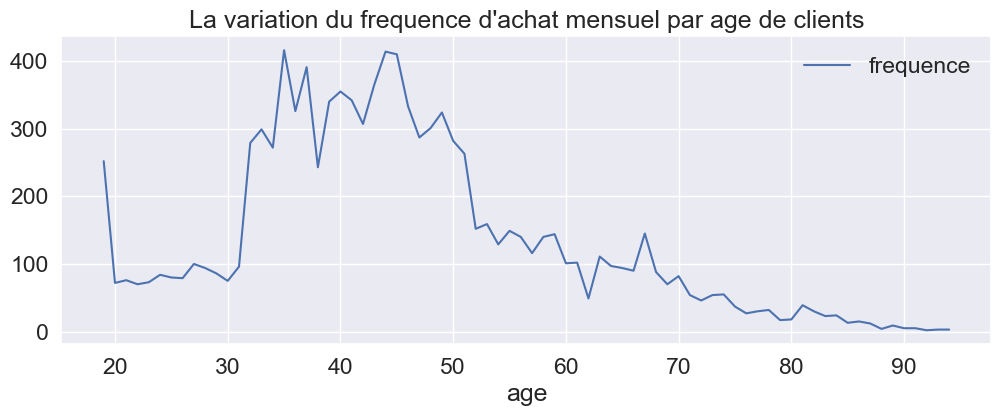

In [239]:
df_frequence_age.plot(x='age', y="frequence", figsize=(12,4),title="La variation du frequence d'achat mensuel par age de clients")
plt.savefig('plot freq30-age.png')

- **D'apres les chiffres et le graphique, nous observons 4 pics qui rapportent une frequence d'achat superieure à 350 achats par mois pour les clients âgés entre 30 et 43 ans.**

In [240]:
df_frequence_age=df_clients_particuliers.groupby(['client_id','age']).apply(lambda x:len(x['session_id'].unique())).reset_index()
df_frequence_age.rename(columns={0:'frequence'},inplace=True)
df_frequence_age.tail(10)

,client_id,age,frequence
8586,c_990,39,133
8587,c_991,45,27
8588,c_992,46,12
8589,c_993,55,13
8590,c_994,21,14
8591,c_995,68,9
8592,c_996,53,79
8593,c_997,29,24
8594,c_998,22,23
8595,c_999,59,42


<AxesSubplot:xlabel='age', ylabel='frequence'>

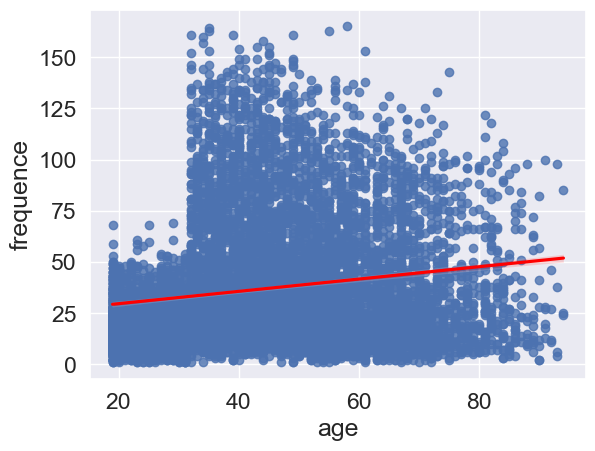

In [241]:
sns.regplot(data=df_frequence_age,x='age',y='frequence',line_kws={'color':'red'})

In [242]:
st.shapiro(df_frequence_age['frequence'])

C:\Users\MAHJOUB Samira\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8570887446403503, pvalue=0.0)

- **La distribution de age est normale**
- **La distribution de frequence est normale**

In [243]:
st.spearmanr(df_frequence_age['age'],df_frequence_age['frequence'])

SpearmanrResult(correlation=0.212296770973657, pvalue=3.5049079111602286e-88)

- **Bilan d'analyse**

- **frequence d'achat & age des clients ont une distribution normale**
- **test Spearman**
- **Une dépendance entre l'âge et le frequence d'achat par client**
- **Corrélation 0.21: plus le client est jeune plus fréquemment il fasse des achats**

## <a name="C35"> <font color='indianred'>5.4 Lien entre l' age des clients et la taille moyenne du panier(CA)</a>

Panier moyen= CA/nombre d'achat 

In [244]:
#age et taille moyen du panier
age_panier=df_clients_particuliers.groupby(['client_id','age','session_id']).agg({'price':sum}).reset_index()
age_panier

,client_id,age,session_id,price
0,c_1,68,s_105105,7.99
1,c_1,68,s_114737,92.62
2,c_1,68,s_120172,44.29
3,c_1,68,s_134971,10.30
4,c_1,68,s_136532,13.78
...,...,...,...,...
319232,c_999,59,s_88239,15.99
319233,c_999,59,s_89648,5.99
319234,c_999,59,s_92374,8.57
319235,c_999,59,s_98289,11.99


In [245]:
moyenne_client=age_panier.groupby(['client_id','age']).agg({'price':np.mean}).reset_index()
moyenne_client

,client_id,age,price
0,c_1,68,16.914545
1,c_10,67,39.811765
2,c_100,31,50.970000
3,c_1000,57,24.321398
4,c_1001,41,38.571489
...,...,...,...
8591,c_995,68,21.045556
8592,c_996,53,20.576962
8593,c_997,29,62.083750
8594,c_998,22,120.864348


In [246]:
st.shapiro(moyenne_client['price'])

C:\Users\MAHJOUB Samira\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8155616521835327, pvalue=0.0)

In [247]:
st.spearmanr(moyenne_client['age'],moyenne_client['price'])

SpearmanrResult(correlation=-0.7011233103707742, pvalue=0.0)

<AxesSubplot:xlabel='age', ylabel='price'>

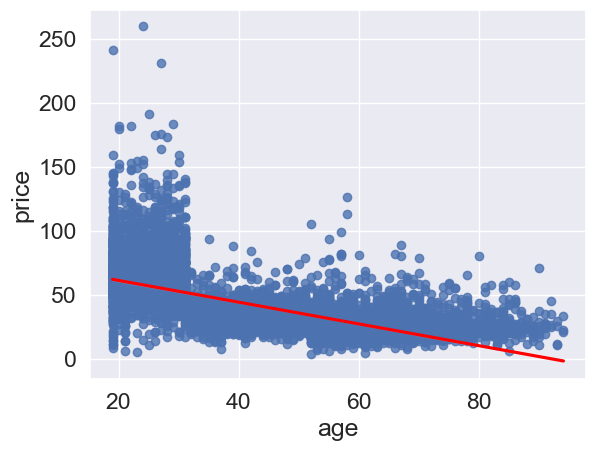

In [248]:
sns.regplot(data=moyenne_client,x='age',y='price',line_kws={'color':'red'})

- **Bilan d'analyse**

- **Panier moyen & age ont une distribution normale**
- **test spearman**
- **Une dépendance entre l'âge et le panier moyen par client**
- **Corrélation négative -70%: plus le client est jeune plus le montant de panier moyen est important**

## <a name="C36"> <font color='indianred'>5.5 Lien entre l' age des clients et la catégorie des livres achetée(CA)</a>

- **En considérant l'age comme une variable quantitative et la variable catégorie qualitative, le test de normalité de l'age (shapiro) s'avère une distribution normale,du coup,nous allons effectuer le test de variance en moyen: KRUSCAl-WALLIS (non paramétrique).**

- **Question : La categorie des livres achetés depend-elle de l'âge du client? Réponse: Oui/Non**

- **H0 : la catégorie des livres achetés ne dépend pas de l'âge**
- **H1 : la catégorie des livres achetés dépend de l'âge**

In [249]:
tst_corr_quali_quanti=df_clients_particuliers.groupby(['id_prod','price']).agg({'categ':sum}).reset_index()
tst_corr_quali_quanti

,id_prod,price,categ
0,0_0,3.75,0.0
1,0_1,10.99,0.0
2,0_10,17.95,0.0
3,0_100,20.60,0.0
4,0_1000,6.84,0.0
...,...,...,...
3257,2_95,98.99,8.0
3258,2_96,47.91,1106.0
3259,2_97,160.99,22.0
3260,2_98,149.74,2.0


In [250]:
st.shapiro(tst_corr_quali_quanti['categ'])

ShapiroResult(statistic=0.3582758903503418, pvalue=0.0)

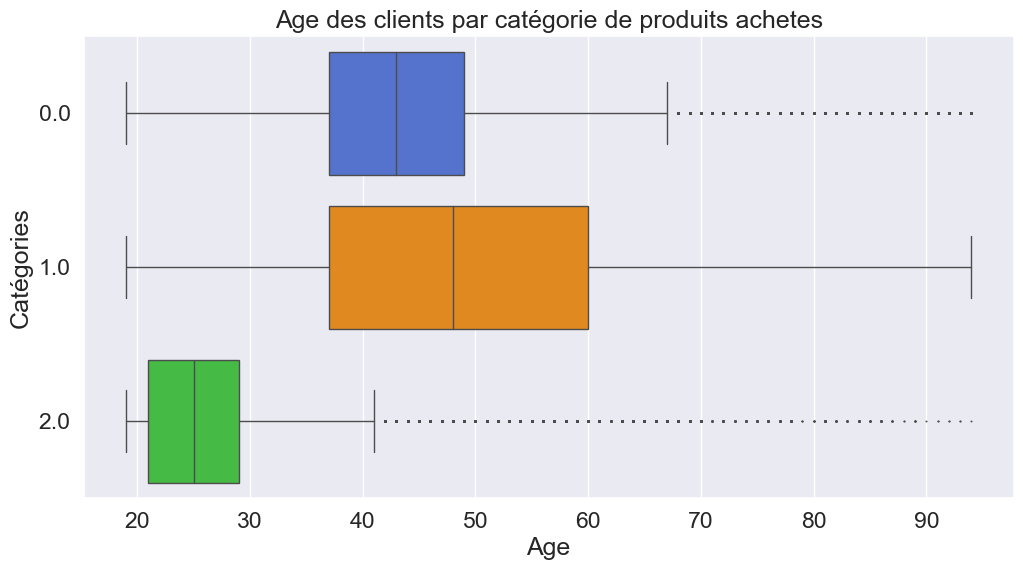

In [251]:
plt.figure(figsize=(12,6))
colors=['royalblue', 'darkorange', 'limegreen']
sns.set(font_scale=1.5)
ax = sns.boxplot(x=df_clients_particuliers.age, y=df_clients_particuliers.categ, orient='h', palette=colors, flierprops = dict(markersize = 0.5), linewidth=1)
ax.set(xlabel='Age', ylabel='Catégories', title='Age des clients par catégorie de produits achetes')
plt.savefig('Boxplot Age-Categ.png', bbox_inches='tight')
plt.show()

In [252]:
kstat, pval = st.kruskal(*[group["age"].values for name, group in df_clients_particuliers.groupby("categ")])
kstat, pval 

(72209.48289794501, 0.0)

- **bilan**

- **Nous trouvons une P-value=0.0 < 0.05 ,il y aurait une dépendance entre l'âge et la catégorie des produits achetés.**